# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import defaultdict

from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score, accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt, nInst) = df.shape
    return (df.values).T

# Load Data

In [4]:
prcAll = loadPrices('prices.txt')

NUM_STOCKS = prcAll.shape[0]

# Build Models

In [5]:
def get_log_returns(prices):
    # get log_returns
    # put into pandas
    prices_df = pd.DataFrame(prices).T
    # turn into log returns
    log_return_df = prices_df.pct_change().apply(lambda x: np.log(1+x)).shift(-1)

    for ma in [5]:
        for stock_i in range(nInst+1):
            log_return_df[f'forward_{ma}_{stock_i}'] = np.log(prices_df[stock_i]/prices_df[stock_i].shift(ma)).shift(-ma)
            log_return_df[f'close_to_close (t-{ma})(t0)_'+str(stock_i)] = np.log(prices_df[stock_i]/prices_df[stock_i].shift(ma))
            
    # for ma in [1, 5]:
    #     for stock_i in range(nInst):
    #         for stock_j in range(stock_i+1, nInst):
    #             log_return_df[f'diff_forward_{ma}_{stock_i}_{stock_j}'] = log_return_df[f'forward_{ma}_{stock_i}'] - log_return_df[f'forward_{ma}_{stock_j}']
                # log_return_df[f'diff_close_to_close (t-{ma})(t0)_'+str(stock_i)+'_'+str(stock_j)] = log_return_df[f'close_to_close (t-{ma})(t0)_{stock_i}'] - log_return_df[f'close_to_close (t-{ma})(t0)_{stock_j}']

    return log_return_df

In [6]:
def feature_engineer(prices):
    
    # add market which is the mean of all returns
    prices = np.vstack((prices, prices.mean(axis=0)))

    log_return_df = get_log_returns(prices)
    # feature engineering

    for stock_id in range(nInst+1):
        # create lags
        # log_return_df['lag1_'+str(stock_id)] = log_return_df[stock_id].shift(1)
        # log_return_df['lag2_'+str(stock_id)] = log_return_df[stock_id].shift(2)
        
        # create MA
        log_return_df['ma5_'+str(stock_id)] = log_return_df[stock_id].rolling(window=5).mean().shift(1)
        # log_return_df['ma10_'+str(stock_id)] = log_return_df[stock_id].rolling(window=10).mean().shift(1)
        # log_return_df['ma20_'+str(stock_id)] = log_return_df[stock_id].rolling(window=20).mean().shift(1)

    log_return_df.rename(columns={stock_id:str(stock_id) for stock_id in range(nInst+1)}, inplace=True)
        
    
    return log_return_df

In [11]:
prices_df = pd.DataFrame(prcAll).T

In [7]:
log_return_df = feature_engineer(prcAll)

Stock 0:           mean abs return = 0.005,            mean abs return = 0.005


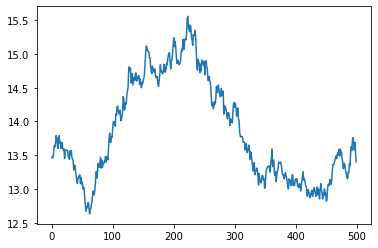

Stock 1:           mean abs return = 0.004,            mean abs return = 0.005


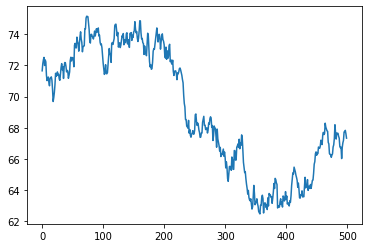

Stock 2:           mean abs return = 0.001,            mean abs return = 0.001


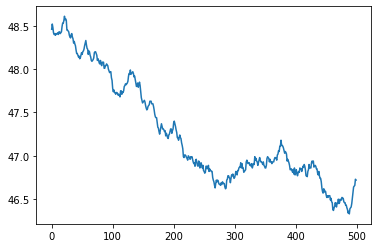

Stock 3:           mean abs return = 0.001,            mean abs return = 0.001


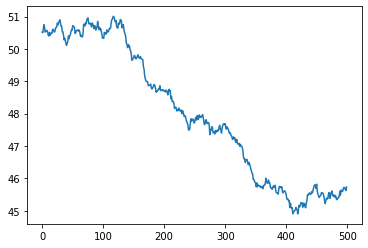

Stock 4:           mean abs return = 0.003,            mean abs return = 0.003


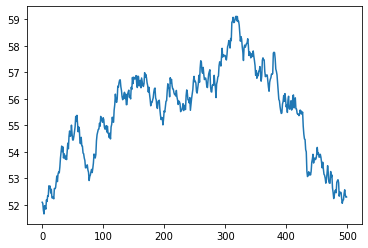

Stock 5:           mean abs return = 0.005,            mean abs return = 0.005


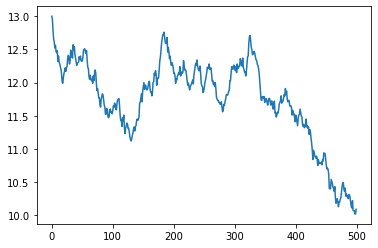

Stock 6:           mean abs return = 0.002,            mean abs return = 0.002


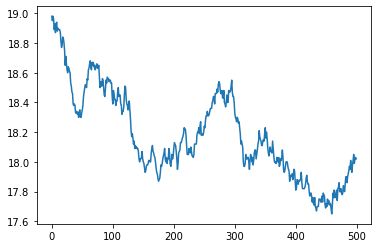

Stock 7:           mean abs return = 0.006,            mean abs return = 0.007


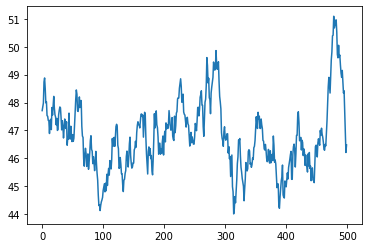

Stock 8:           mean abs return = 0.001,            mean abs return = 0.001


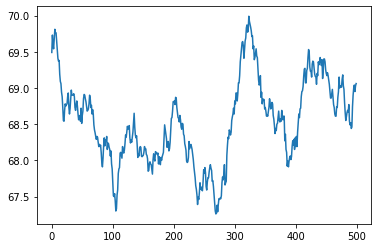

Stock 9:           mean abs return = 0.007,            mean abs return = 0.007


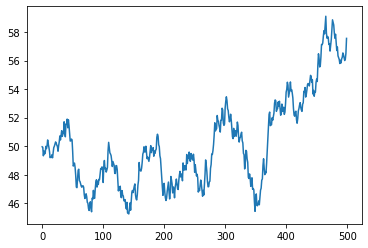

Stock 10:           mean abs return = 0.008,            mean abs return = 0.007


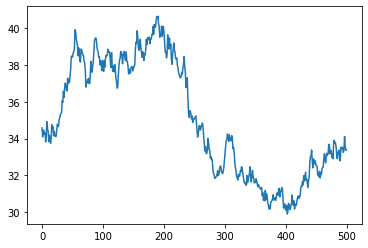

Stock 11:           mean abs return = 0.008,            mean abs return = 0.008


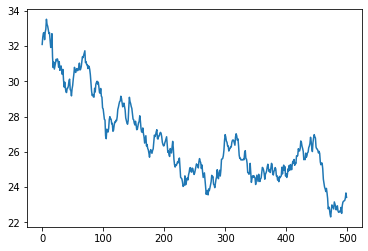

Stock 12:           mean abs return = 0.002,            mean abs return = 0.002


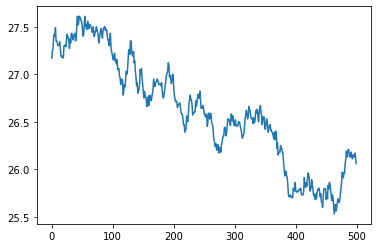

Stock 13:           mean abs return = 0.005,            mean abs return = 0.005


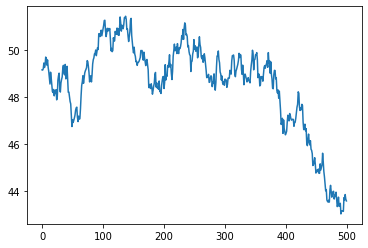

Stock 14:           mean abs return = 0.007,            mean abs return = 0.007


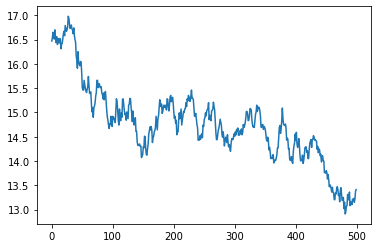

Stock 15:           mean abs return = 0.005,            mean abs return = 0.005


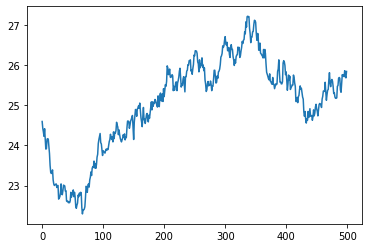

Stock 16:           mean abs return = 0.001,            mean abs return = 0.001


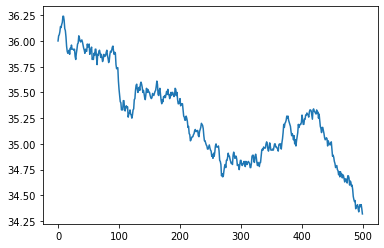

Stock 17:           mean abs return = 0.001,            mean abs return = 0.001


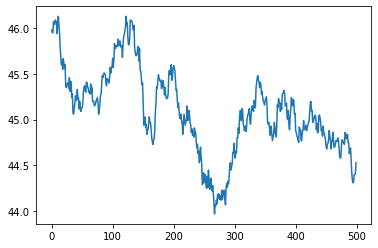

Stock 18:           mean abs return = 0.002,            mean abs return = 0.002


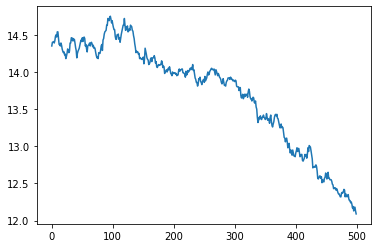

Stock 19:           mean abs return = 0.007,            mean abs return = 0.007


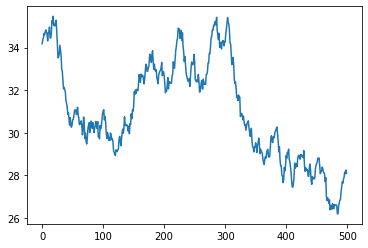

Stock 20:           mean abs return = 0.007,            mean abs return = 0.007


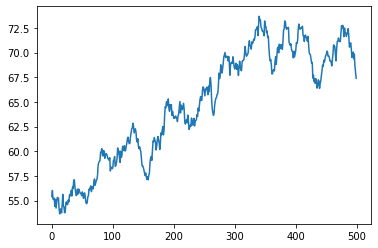

Stock 21:           mean abs return = 0.003,            mean abs return = 0.003


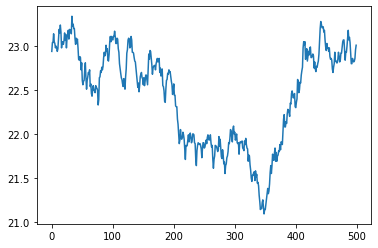

Stock 22:           mean abs return = 0.008,            mean abs return = 0.007


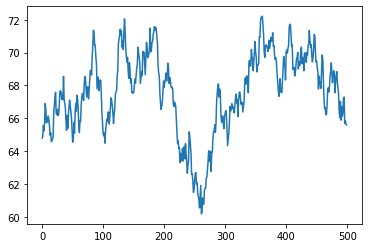

Stock 23:           mean abs return = 0.004,            mean abs return = 0.004


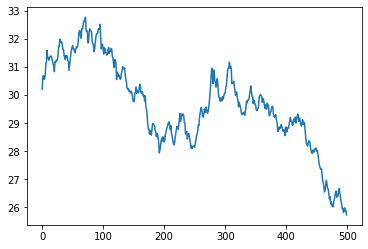

Stock 24:           mean abs return = 0.002,            mean abs return = 0.002


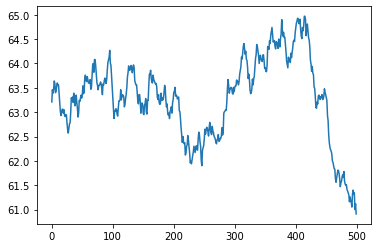

Stock 25:           mean abs return = 0.009,            mean abs return = 0.008


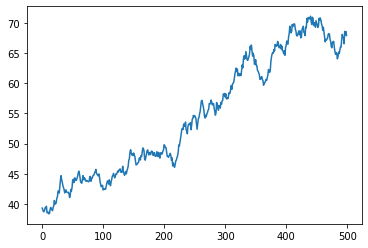

Stock 26:           mean abs return = 0.006,            mean abs return = 0.007


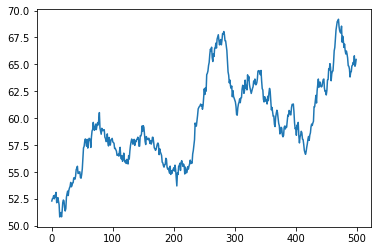

Stock 27:           mean abs return = 0.0,            mean abs return = 0.0


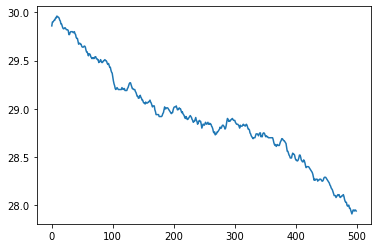

Stock 28:           mean abs return = 0.002,            mean abs return = 0.002


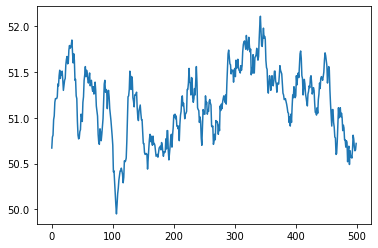

Stock 29:           mean abs return = 0.002,            mean abs return = 0.002


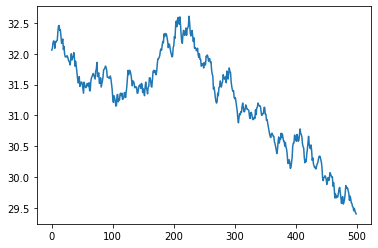

Stock 30:           mean abs return = 0.006,            mean abs return = 0.006


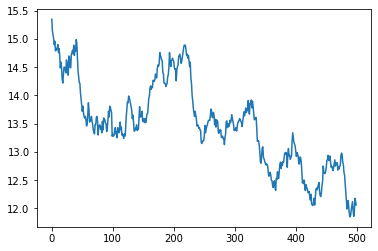

Stock 31:           mean abs return = 0.003,            mean abs return = 0.003


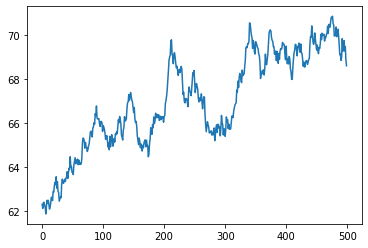

Stock 32:           mean abs return = 0.004,            mean abs return = 0.004


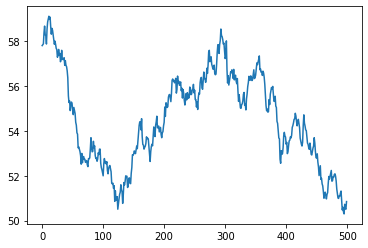

Stock 33:           mean abs return = 0.005,            mean abs return = 0.005


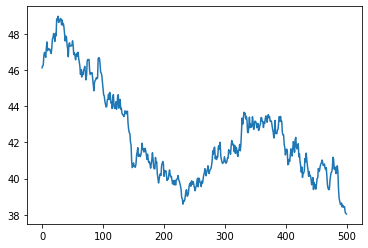

Stock 34:           mean abs return = 0.003,            mean abs return = 0.003


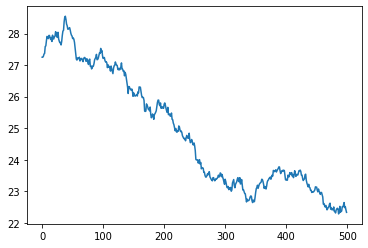

Stock 35:           mean abs return = 0.007,            mean abs return = 0.007


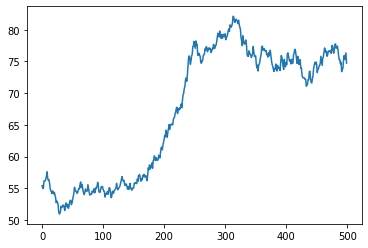

Stock 36:           mean abs return = 0.007,            mean abs return = 0.007


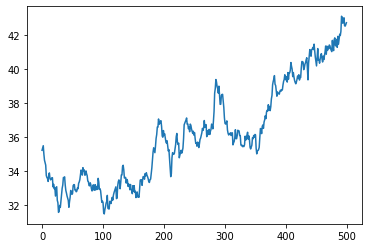

Stock 37:           mean abs return = 0.006,            mean abs return = 0.006


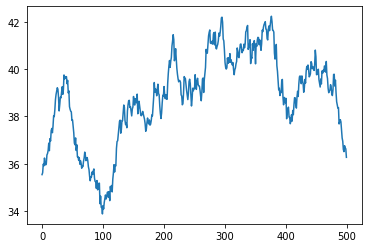

Stock 38:           mean abs return = 0.001,            mean abs return = 0.001


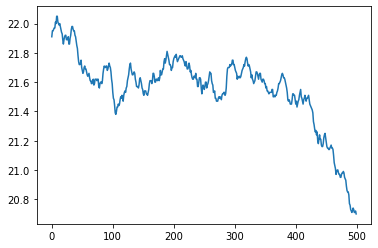

Stock 39:           mean abs return = 0.001,            mean abs return = 0.001


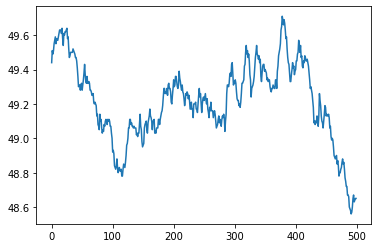

Stock 40:           mean abs return = 0.002,            mean abs return = 0.002


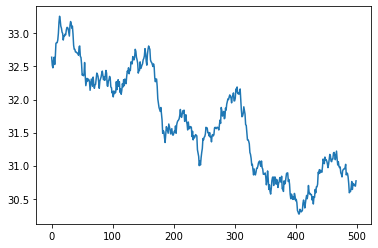

Stock 41:           mean abs return = 0.007,            mean abs return = 0.007


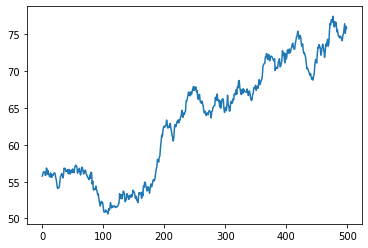

Stock 42:           mean abs return = 0.005,            mean abs return = 0.005


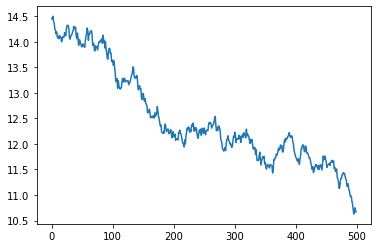

Stock 43:           mean abs return = 0.007,            mean abs return = 0.008


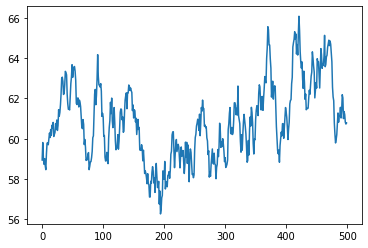

Stock 44:           mean abs return = 0.005,            mean abs return = 0.005


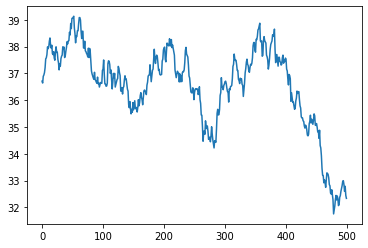

Stock 45:           mean abs return = 0.002,            mean abs return = 0.002


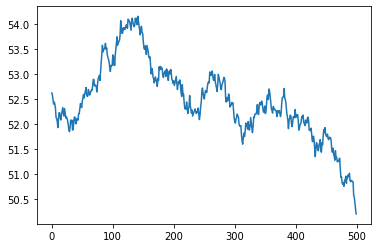

Stock 46:           mean abs return = 0.005,            mean abs return = 0.005


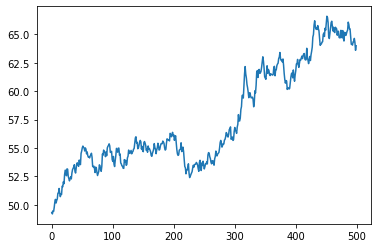

Stock 47:           mean abs return = 0.003,            mean abs return = 0.003


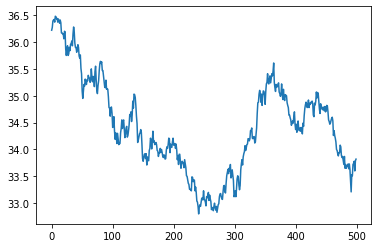

Stock 48:           mean abs return = 0.007,            mean abs return = 0.007


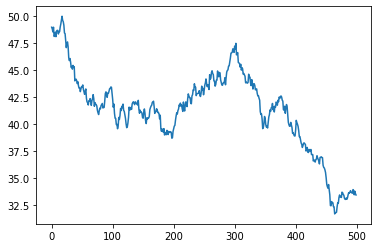

Stock 49:           mean abs return = 0.004,            mean abs return = 0.004


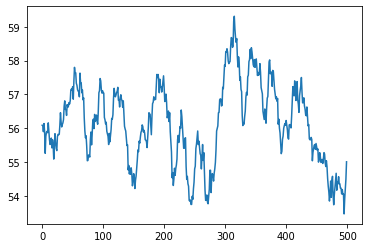

In [24]:
for i in range(50):
    prices_df[i].plot()
    print(f'Stock {i}:\
           mean abs return = {np.round(np.abs(log_return_df[str(i)].iloc[:250]).mean(), 3)}, \
           mean abs return = {np.round(np.abs(log_return_df[str(i)]).mean(), 3)}')
    plt.show()